<a href="https://colab.research.google.com/github/ibribr/Control-Engineering/blob/main/chapter_7_Example_7_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
!pip install control

In [76]:
from control import tf, tf2ss, ss, ss2tf, forced_response, pzmap, tfdata, feedback, TransferFunction
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
#from sympy import symbols, Matrix, eye, Inverse

<LinearIOSystem>: sys[28]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']
States (3): ['x[0]', 'x[1]', 'x[2]']

A = [[ -5.   1.   0.]
     [  0.  -2.   1.]
     [ 20. -10.   1.]]

B = [[0.]
     [0.]
     [1.]]

C = [[-1.  1.  0.]]

D = [[0.]]

Closed loop TF:  
         s + 4
-----------------------
s^3 + 6 s^2 + 13 s + 20



(array([-4.+0.j, -1.+2.j, -1.-2.j]), array([-4.+0.j]))

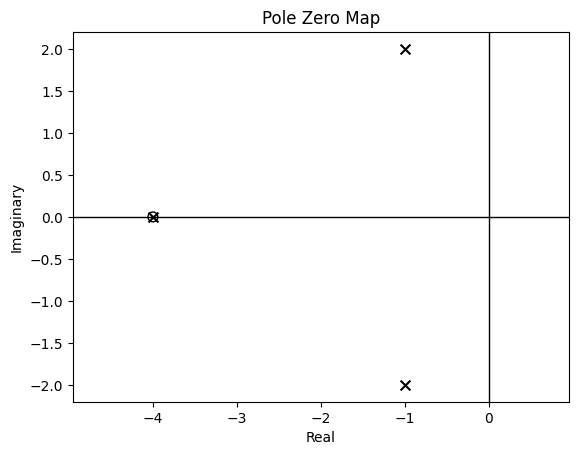

In [84]:
# Define your state space model and laplace variable as s:
# Step 1: Define the symbols and matrices
s = symbols('s')
# Define matrices A, B, C based on your system
A = Matrix([[-5, 1, 0],[0, -2, 1],[20, -10, 1]])
B = Matrix([[0],[0],[1]])
C = Matrix([[-1, 1, 0]])
D = Matrix([0])

sys = ss(A, B, C,D)
print(sys)

T = ss2tf(sys)
print("Closed loop TF: ", T)

pzmap(T)

In [99]:
# find steady state error
I = np.eye(A.shape[0])      # Identity matrix of the same size as A

# compute sI - A and its inverse and then closed loop TF
TF = C * Inverse(s * I - A) * B
print("Closed loop TF: ", simplify(TF[0]))

E = 1 - TF[0]
R = 1/s          # for step
#R = 1/s**2        # for ramp
E = R * E
print("E: ", simplify(E))

# take the limit
ess = limit(s*E, s, 0)
print("ess: ", ess)


Closed loop TF:  20.0/(20.0*s**2 + 40.0*s + 100.0)
E:  (20.0*s**2 + 40.0*s + 80.0)/(s*(20.0*s**2 + 40.0*s + 100.0))
ess:  4/5


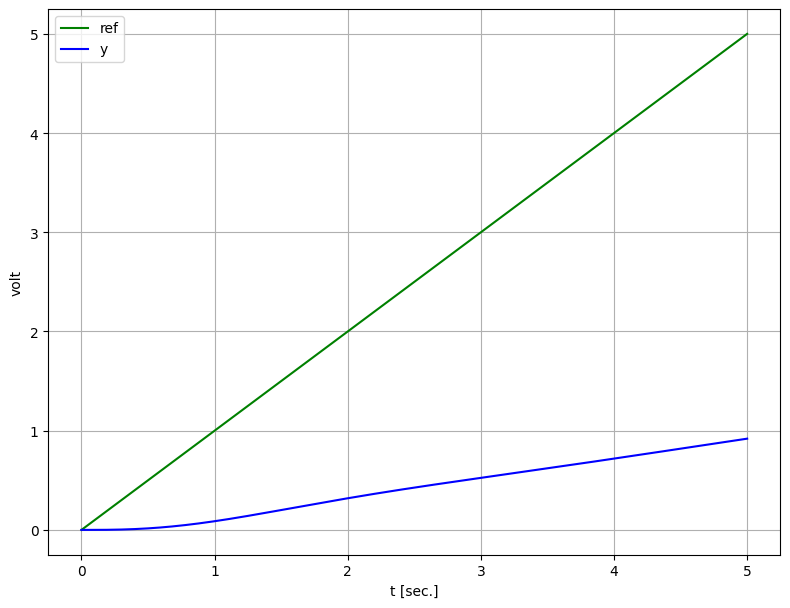

In [101]:
#Step test of the closed loop TF
# define signals :
t0 = 0
t1 = 5
dt = 0.01
nt = int ( t1 / dt ) + 1 # Number of points of sim time
t = np.linspace(t0, t1, nt)
#r = 1 * np.ones(nt)
r = 1 * t

# Simulation :
(t, y) = forced_response(sys, T=t, U=r, X0=0)

# Plotting :
plt.close("all")

fig_width_cm = 24
fig_height_cm = 18

plt.figure(1, figsize =(fig_width_cm/2.54,fig_height_cm/2.54))
plt.plot(t, r, "green")
plt.plot(t, y, "blue")

plt.grid()
plt.legend(labels =( "ref", "y"))
plt.xlabel("t [sec.]")
plt.ylabel("volt")
plt.savefig("sim_tf.pdf")

State Space Representation:
A matrix: 
 [[-3. -2. -3.]
 [ 1.  0.  0.]
 [ 0.  1.  0.]]
B matrix: 
 [[1.]
 [0.]
 [0.]]
C matrix: 
 [[0. 0. 3.]]
D matrix: 
 [[0.]]


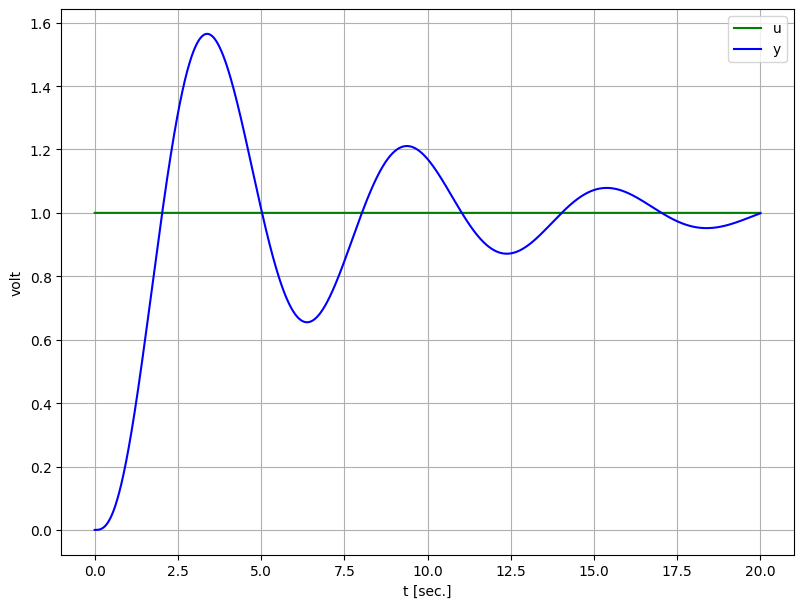

In [ ]:
# Convert to State Space
sys = tf2ss(TF)
A = sys.A
B = sys.B
C = sys.C
D = sys.D

print("State Space Representation:")
print("A matrix: \n", A)
print("B matrix: \n", B)
print("C matrix: \n", C)
print("D matrix: \n", D)

# Simulation :
(t, y) = forced_response(sys, T=t, U=u, X0=0)

# Plotting :
plt.close("all")
plt.figure(1, figsize =(fig_width_cm/2.54,fig_height_cm/2.54))
plt.plot(t, u, "green")
plt.plot(t, y, "blue")

plt.grid()
plt.legend(labels =( "u", "y"))
plt.xlabel("t [sec.]")
plt.ylabel("volt")
plt.savefig("sim_tf.pdf")

3
(2001,)


<ipython-input-84-a2bdbf1a1d0a>:39: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  yplot[i] = y


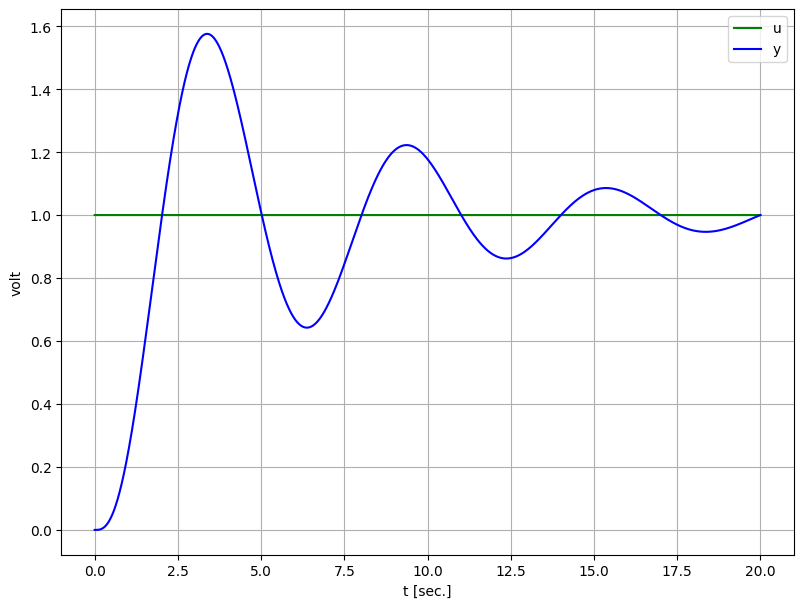

In [ ]:
sys = tf2ss(G)
A = sys.A
B = sys.B
C = sys.C
D = sys.D

print(A.shape[0])

# Simulate in a "for" loop
t0 = 0
t1 = 20
dt = 0.01
nt = int ( t1 / dt ) + 1 # Number of points of sim time
t = np.linspace(t0, t1, nt)

r = 1 * np.ones(nt)  # Reference input

# controller parameters
kp = 1.0
ki = 0.0
u = 0.0

x = np.zeros([A.shape[0],1])
yplot = np.zeros(nt)
print(yplot.shape)
sum_e = 0

for i in range(nt):
  # state space model
  xdot=np.dot(A, x)+np.dot(B,u)
  x = x + xdot*dt
  y = np.dot(C,x)+np.dot(D,u)

  # controller
  e = r[i] - y
  u = kp * e + ki * sum_e
  sum_e = sum_e + e

  yplot[i] = y

# Plotting :
plt.close("all")
plt.figure(1, figsize =(fig_width_cm/2.54,fig_height_cm/2.54))
plt.plot(t, r, "green")
plt.plot(t, yplot, "blue")

plt.grid()
plt.legend(labels =( "u", "y"))
plt.xlabel("t [sec.]")
plt.ylabel("volt")
plt.savefig("sim_tf.pdf")